In [ ]:
from google.colab import files

uploaded=files.upload()


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


About the data (Description of attributes)
age: Age of the patient
anaemia: Haemoglobin level of patient (Boolean)
creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
diabetes: If the patient has diabetes (Boolean)
ejection_fraction: Percentage of blood leaving the heart at each contraction
high_blood_pressure: If the patient has hypertension (Boolean)
platelets: Platelet count of blood (kiloplatelets/mL)
serum_creatinine: Level of serum creatinine in the blood (mg/dL)
serum_sodium: Level of serum sodium in the blood (mEq/L)
sex: Sex of the patient
smoking: If the patient smokes or not (Boolean)
time: Follow-up period (days)
DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)
[Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

*   List item
*   List item



In [ ]:
# Checking for any missing values across the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203')]

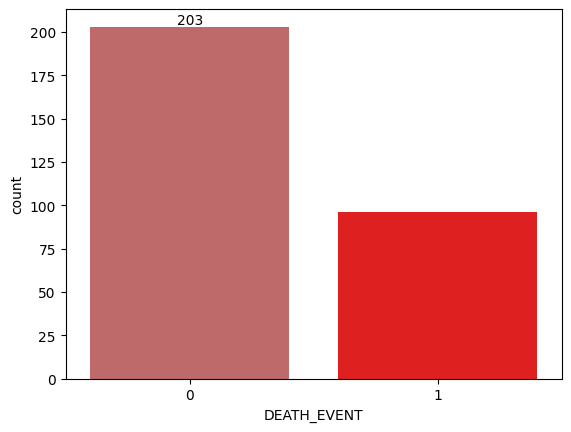

In [ ]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

In [ ]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

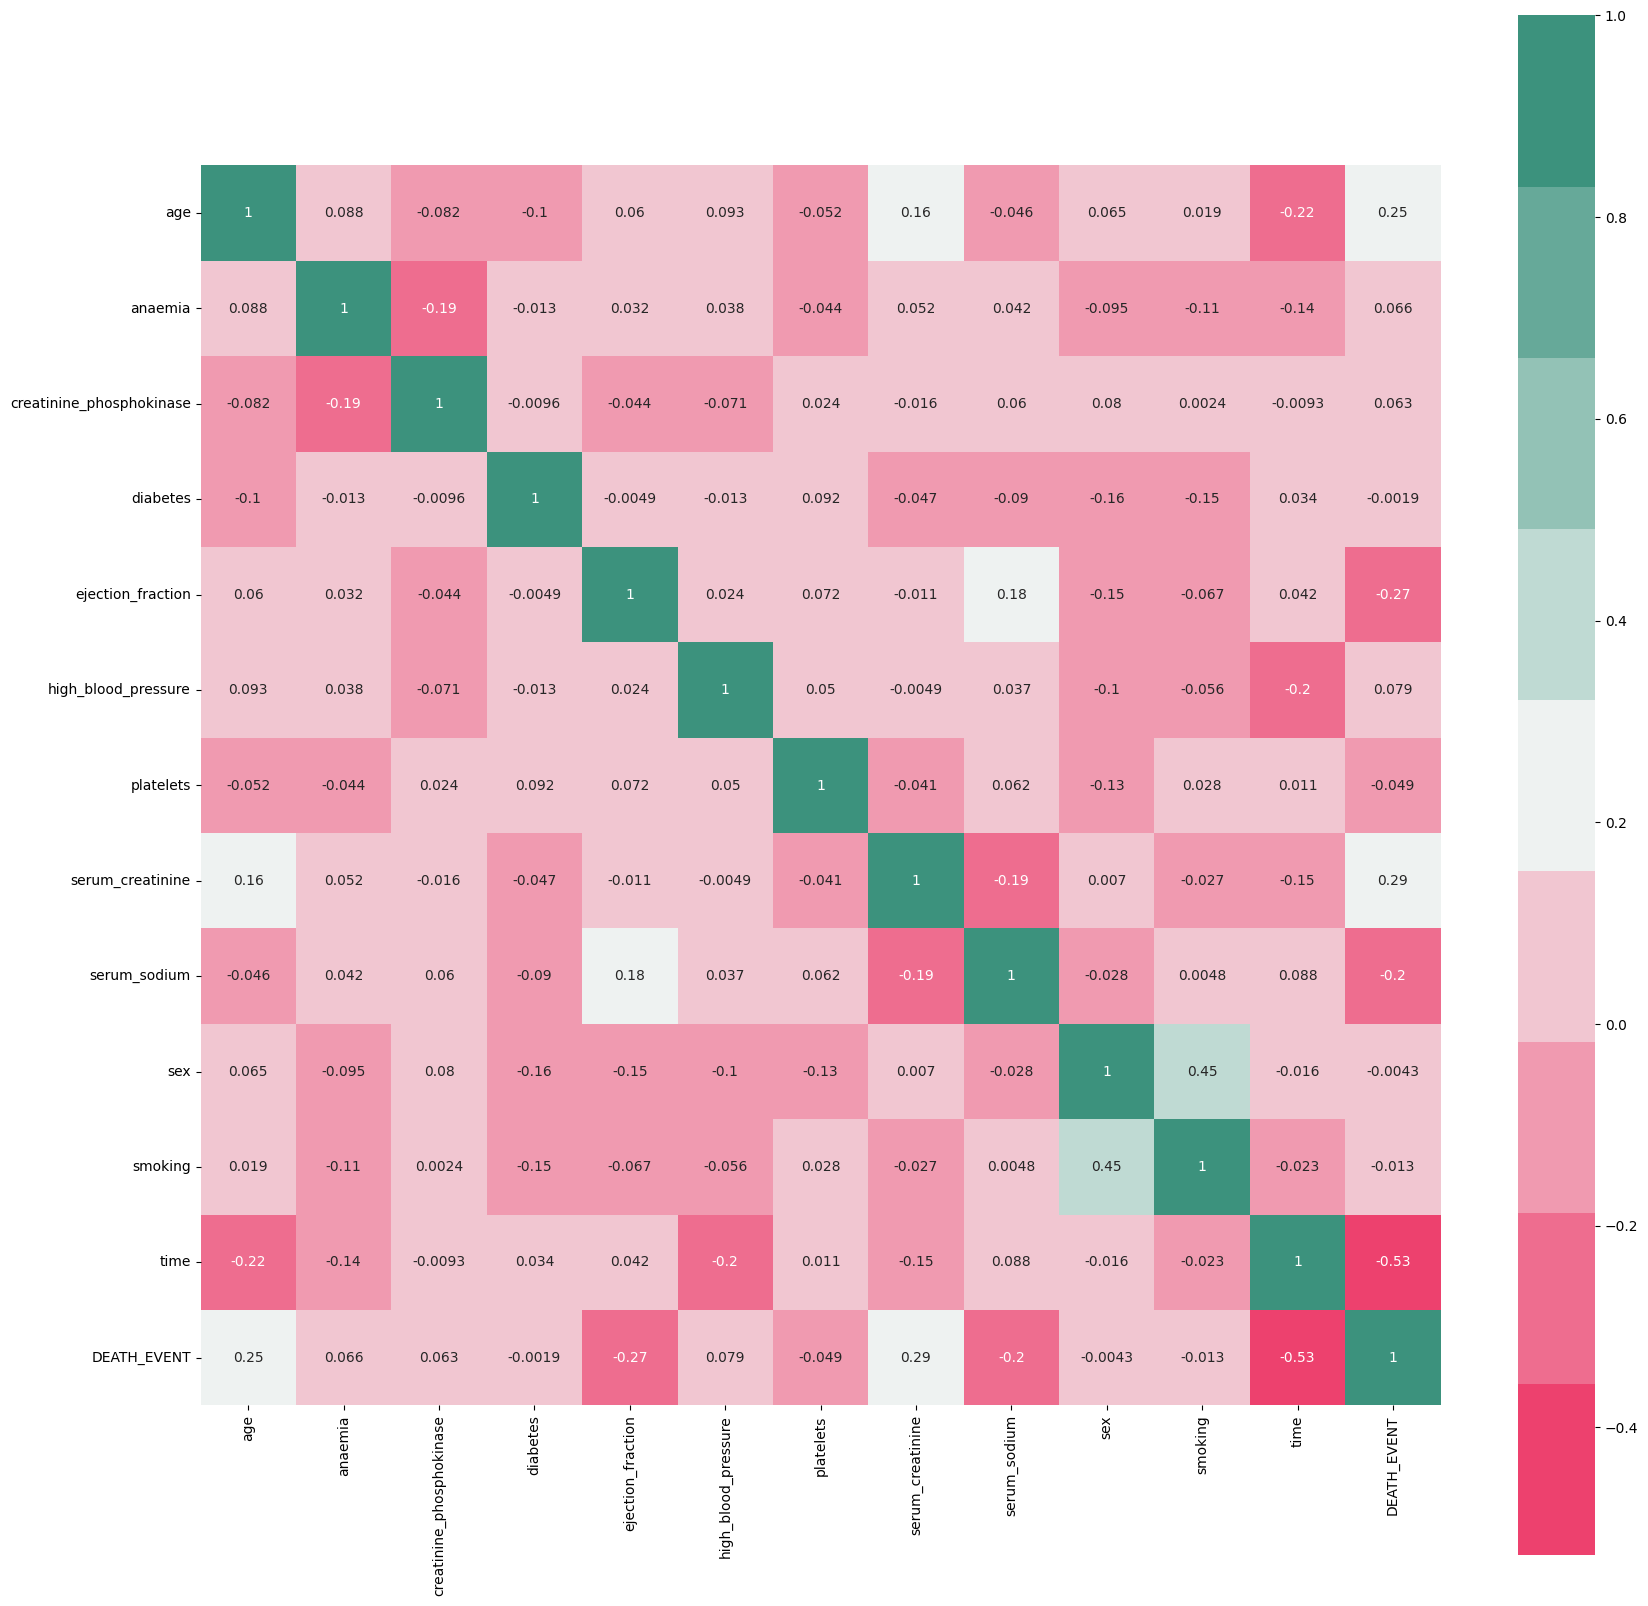

In [ ]:
#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Text(0.5, 1.0, 'Distribution Of Age')

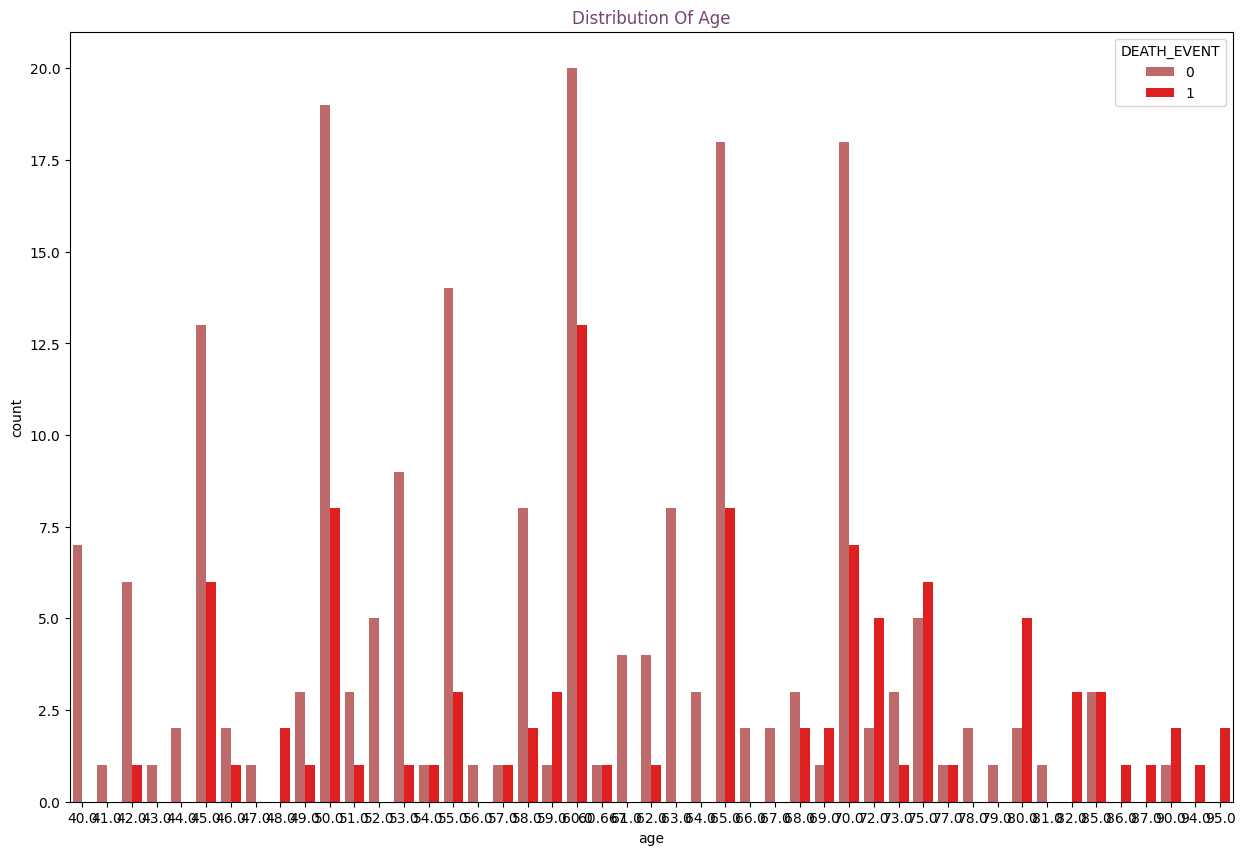

In [ ]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

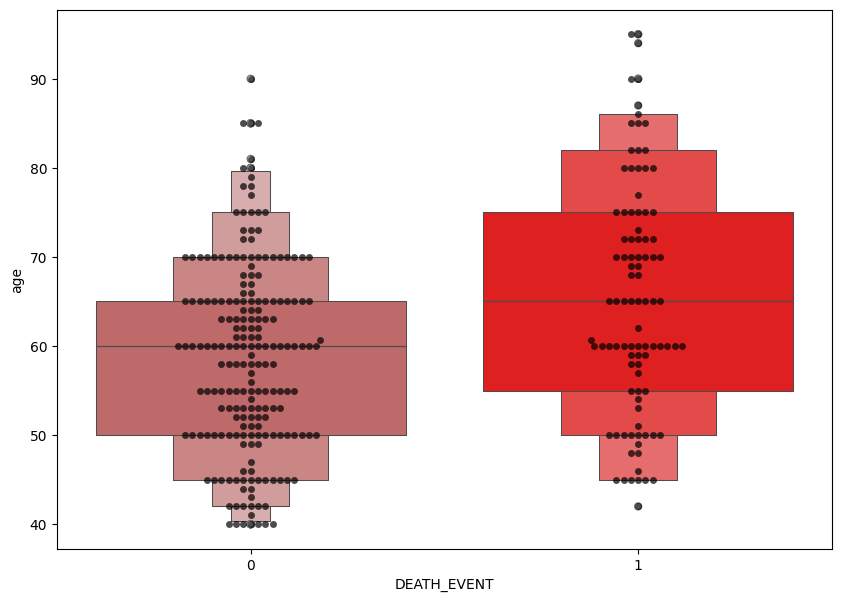

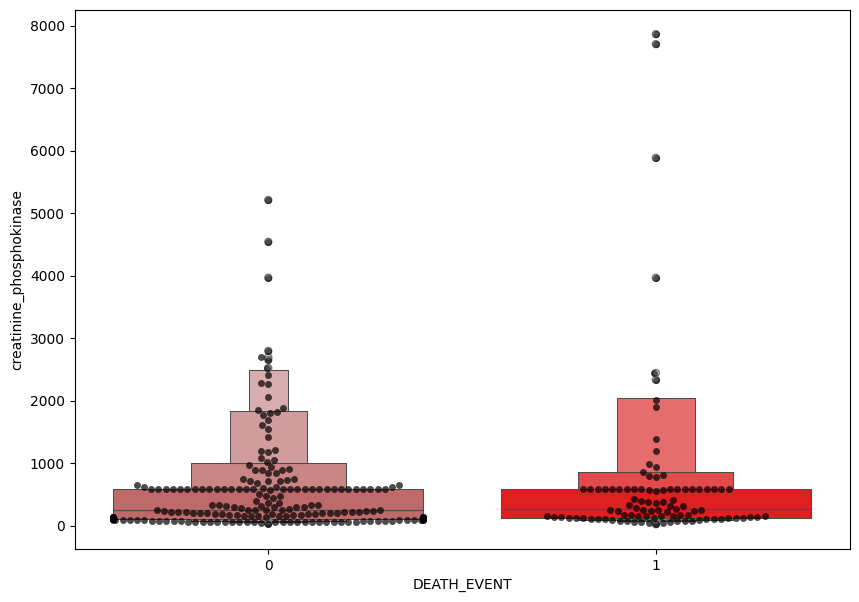

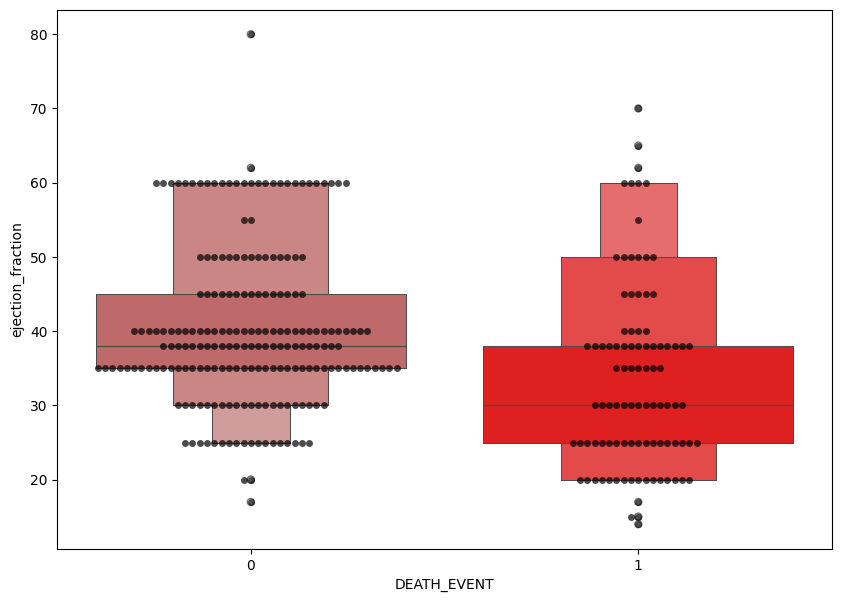

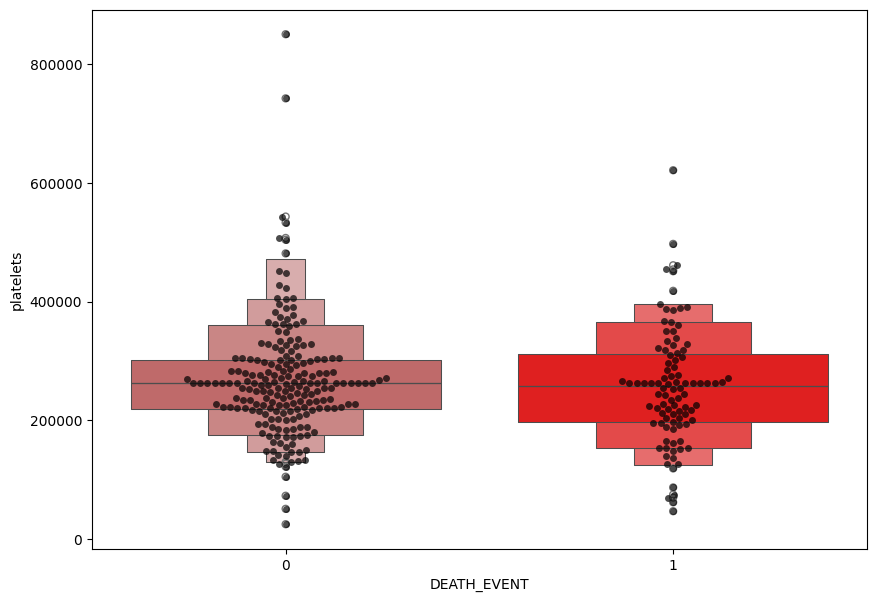

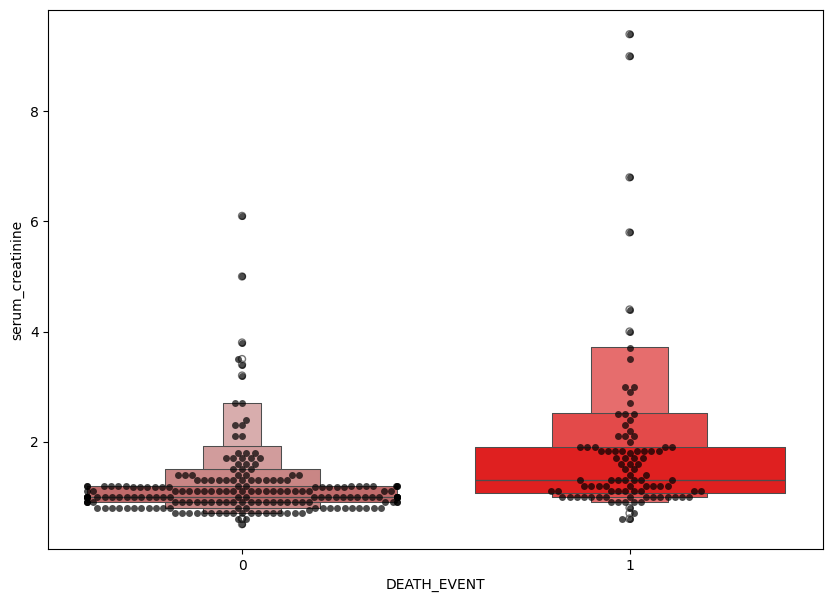

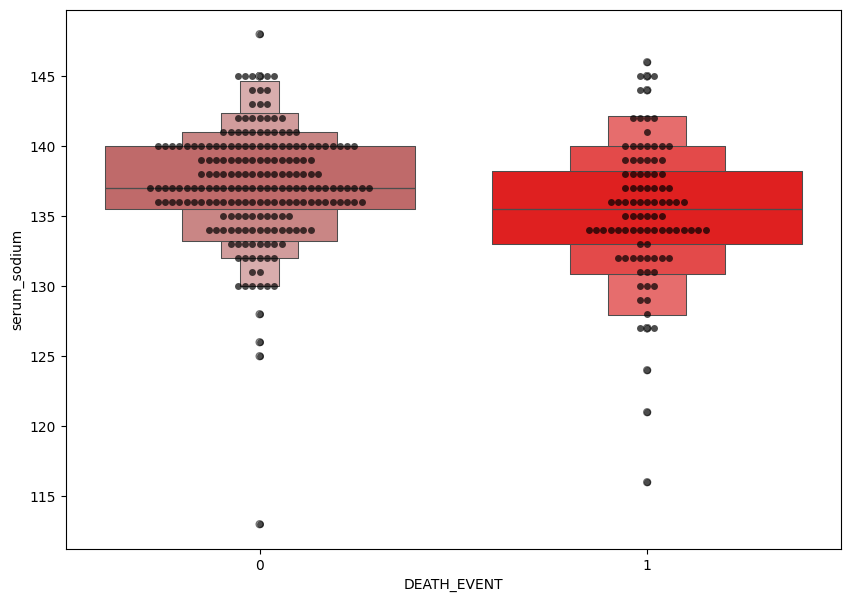

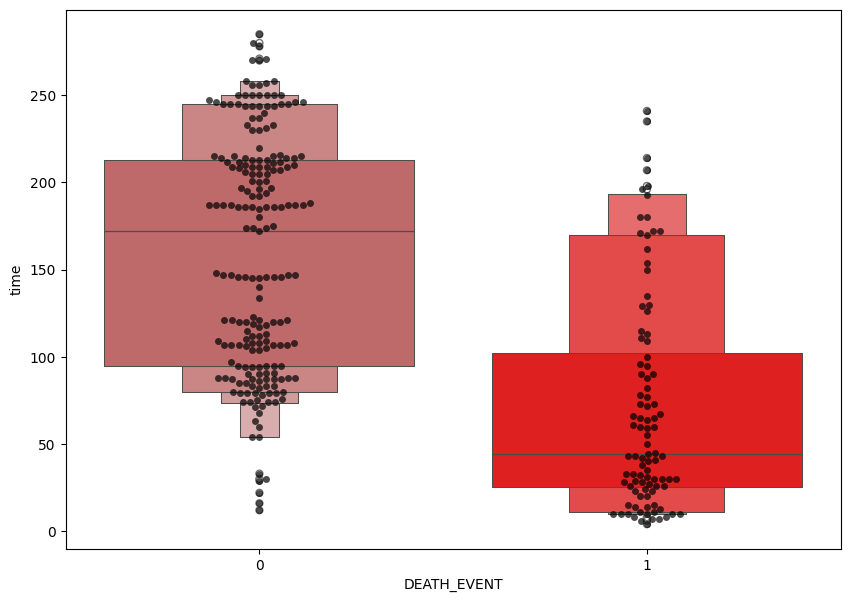

In [ ]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    plt.show()

<Axes: xlabel='time', ylabel='age'>

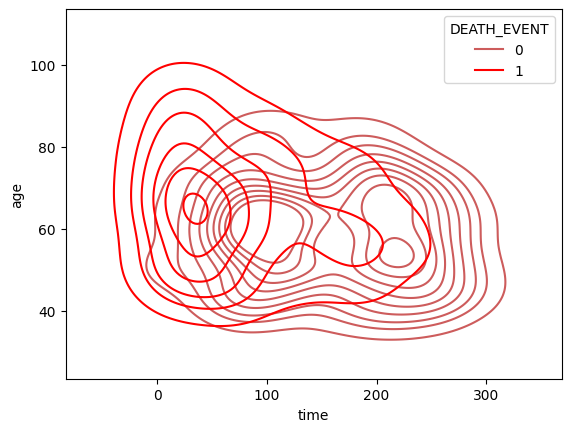

In [ ]:
# Plotting "Kernel Density Estimation (kde plot)" of time and age features -  both of which are significant ones.
sns.kdeplot(x=data_df["time"], y=data_df["age"], hue =data_df["DEATH_EVENT"], palette=cols)

data preprocessing

In [ ]:
# Defining independent and dependent attributes in training and test sets
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


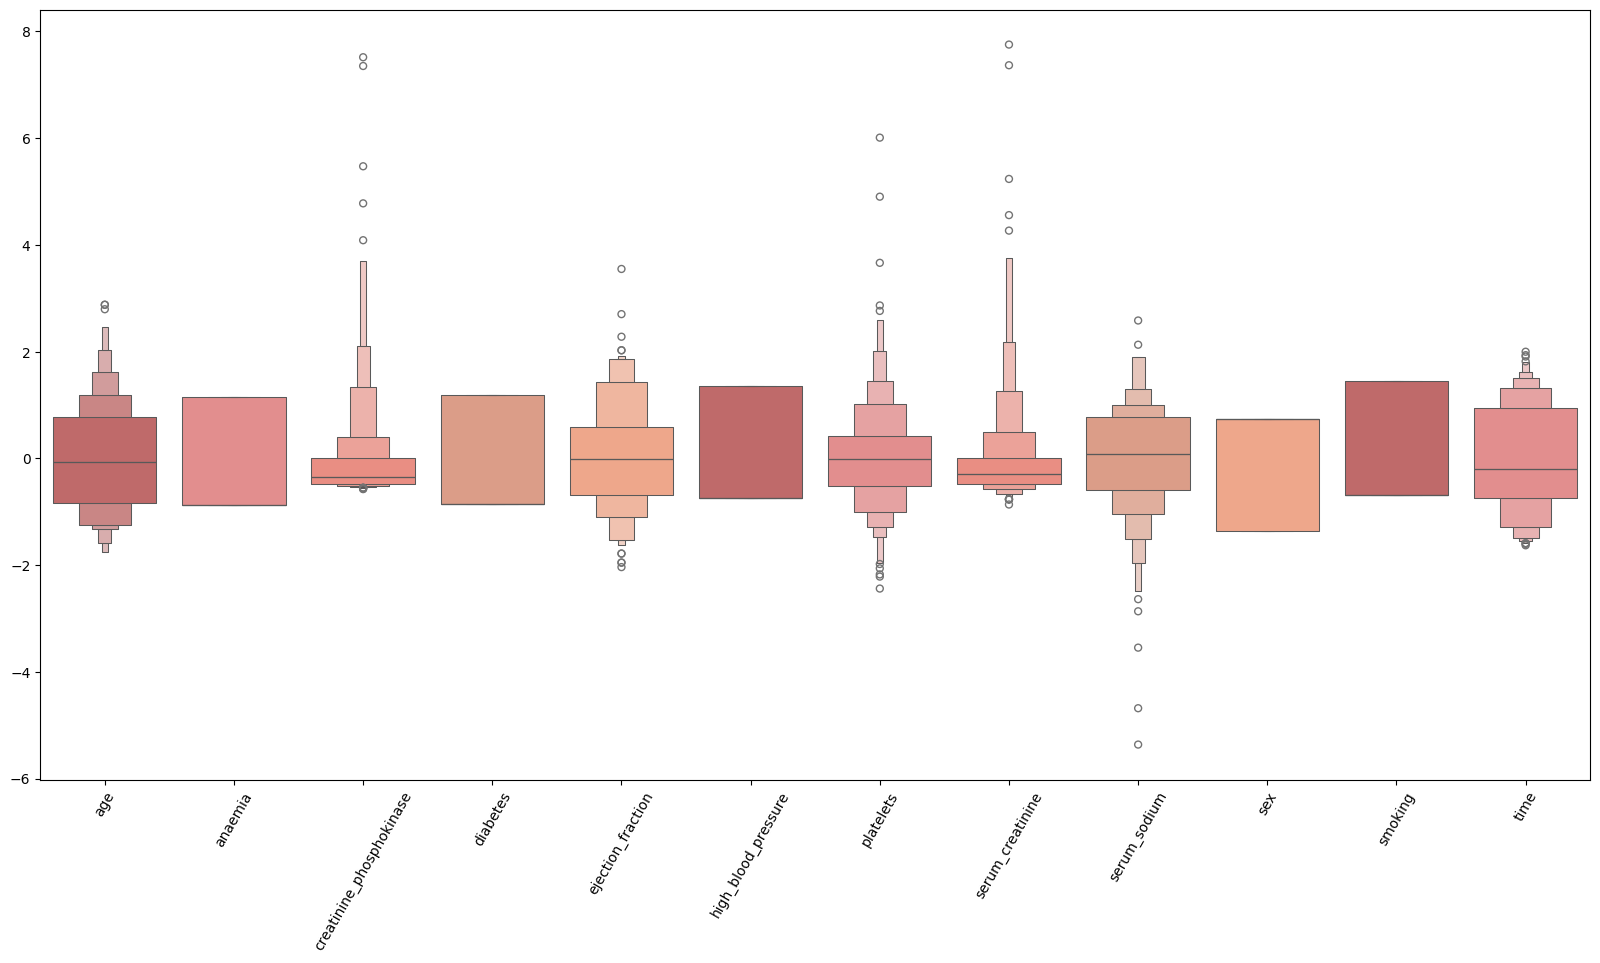

In [ ]:
#Plotting the scaled features using boxen plots
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [ ]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

1. SUPPORT VECTOR MACHINE (SVM)

In [ ]:
import joblib
from sklearn import svm

# Instantiating the SVM algorithm
model1=svm.SVC()

# Fitting the model
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score
model1.score (X_test, y_test)

# Saving the model
joblib.dump(model1, 'svm_model.pkl')




['svm_model.pkl']

In [ ]:
# Printing classification report (since there was biasness in target labels)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



<Axes: >

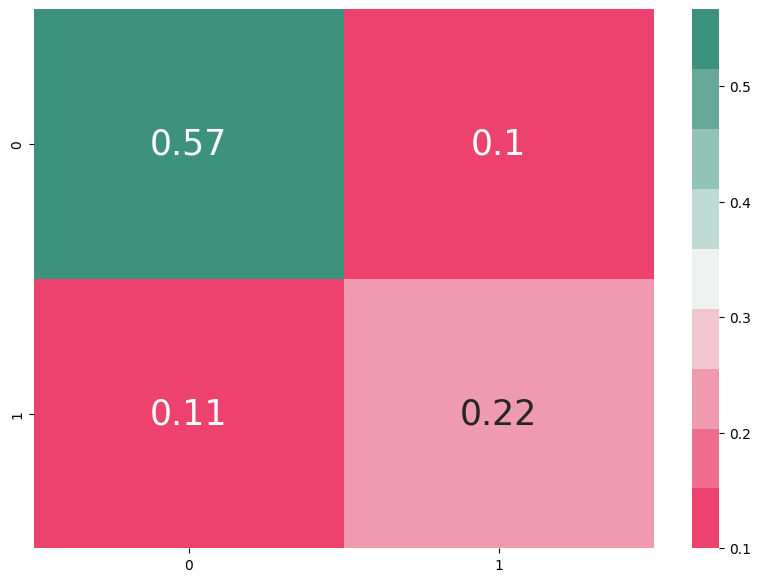

In [ ]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

2. Artificial Neural Network (ANN)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import callbacks

# Define early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=20,      # how many epochs to wait before stopping
    restore_best_weights=True
)

# Initialize the NN
model = Sequential()

# Add layers
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size=25, epochs=80, callbacks=[early_stopping], validation_split=0.25)

# Save the model
model.save('ann_model.h5')

Epoch 1/80
7/7 [==============================] - 2s 88ms/step - loss: 0.6929 - accuracy: 0.5897 - val_loss: 0.6913 - val_accuracy: 0.8302
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.6922 - accuracy: 0.6346 - val_loss: 0.6896 - val_accuracy: 0.8302
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6915 - accuracy: 0.6346 - val_loss: 0.6879 - val_accuracy: 0.8302
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.6346 - val_loss: 0.6864 - val_accuracy: 0.8302
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.6346 - val_loss: 0.6849 - val_accuracy: 0.8302
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.6895 - accuracy: 0.6346 - val_loss: 0.6832 - val_accuracy: 0.8302
Epoch 7/80
7/7 [==============================] - 0s 12ms/step - loss: 0.6889 - accuracy: 0.6346 - val_loss: 0.6814 - val_accuracy: 0.8302
Epoch 8/80
7/7 [==============

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 84.70%


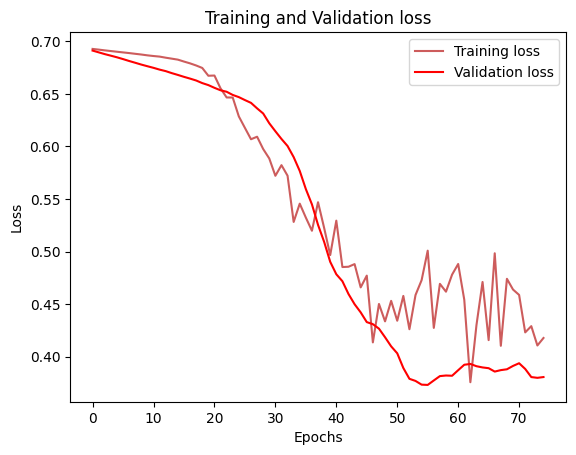

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

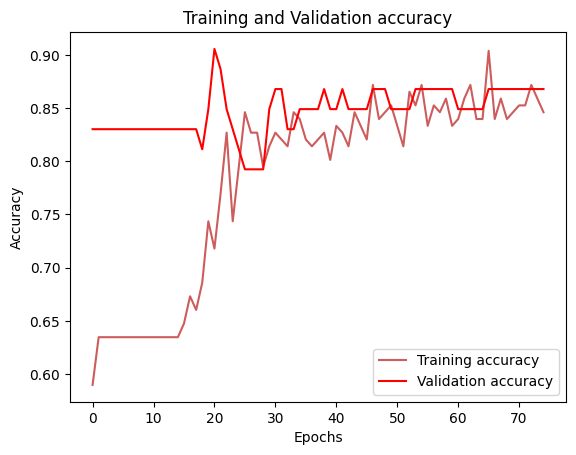

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

3/3 [==============================] - 0s 3ms/step


<Axes: >

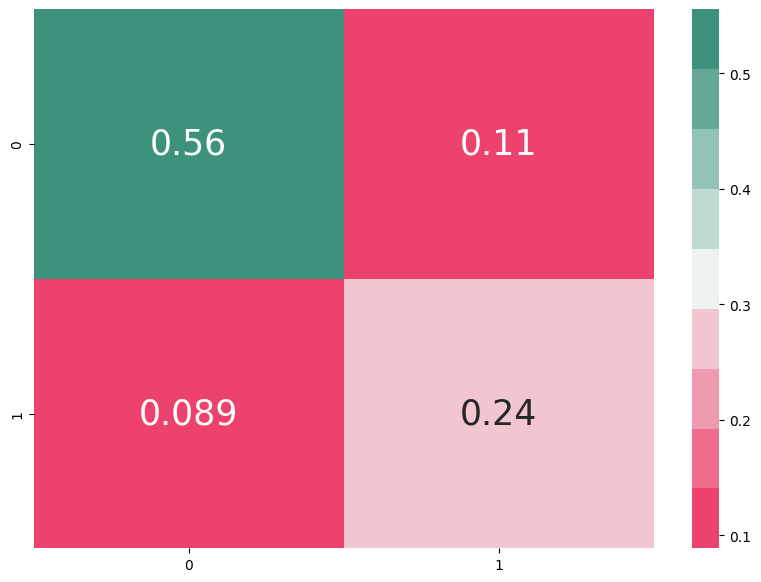

In [ ]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        60
           1       0.69      0.73      0.71        30

    accuracy                           0.80        90
   macro avg       0.77      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90



In [ ]:

print("As ANN has more accuracy than SVM therefore we are using ANN only")
#Process predictions as needed
# print(predictions)
# predictions = np.mean(history.history['val_accuracy'])
# print("\n%s: %.2f%%" % ('val_accuracy is', predictions*100))
from tensorflow.keras.models import load_model

# Load the saved ANN model
ann_model = load_model('ann_model.h5')

# Take user input
user_input = {}

# Example: Assuming user_input is a dictionary of feature names and numerical values
user_input['age'] = float(input("Age: "))
user_input['anaemia'] = float(input("Anaemia (0/1): "))
user_input['creatinine_phosphokinase'] = float(input("Creatinine Phosphokinase: "))
user_input['diabetes'] = float(input("Diabetes (0/1): "))
user_input['ejection_fraction'] = float(input("Ejection Fraction: "))
user_input['high_blood_pressure'] = float(input("High Blood Pressure (0/1): "))
user_input['platelets'] = float(input("Platelets: "))
user_input['serum_creatinine'] = float(input("Serum Creatinine: "))
user_input['serum_sodium'] = float(input("Serum Sodium: "))
user_input['sex'] = float(input("Sex (1:M, 0:F): "))
user_input['smoking'] = float(input("Smoking (0/1): "))
user_input['time'] = float(input("Time (days): "))

# Now user_input contains the input data in dictionary format
print(user_input)


# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Scale the user input using the same scaler used for training data
user_input_scaled = s_scaler.transform(user_input_df)

# Convert the scaled input back to a DataFrame
user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=col_names)
threshold = 0.5

# Perform predictions
predictions = ann_model.predict(user_input_scaled_df)

if predictions[0][0] > threshold:
    print("The person is at risk of heart failure.")
    print("Please consult a doctor for better health")
    print("after consultinng the doctor  ")
    # Check specific parameters that contributed to the prediction
    if user_input['age'] > 60:
        print("Considering your age, it's important to prioritize heart health.")
        print("- Consult with a cardiologist for regular check-ups and screenings.")
        print("- Focus on maintaining a healthy weight and exercising regularly, with guidance from a healthcare professional.")

    if user_input['high_blood_pressure'] == 1:
        print("High blood pressure is a risk factor for heart failure.")
        print("- Monitor your blood pressure regularly and follow your doctor's recommendations for managing hypertension.")
        print("- Limit sodium intake and adopt a heart-healthy diet rich in fruits, vegetables, and whole grains.")

    if user_input['diabetes'] == 1:
        print("Diabetes increases the risk of heart disease.")
        print("- Maintain tight control over blood sugar levels through medication, diet, and exercise.")
        print("- Schedule regular appointments with your healthcare provider for diabetes management and heart health assessments.")
else:
    print("The person is not at risk of heart failure.")
    print("you are perfectly fine keep going with healthy diet")





As ANN has more accuracy than SVM therefore we are using ANN only
Age: 22
Anaemia (0/1): 0
Creatinine Phosphokinase: 90
Diabetes (0/1): 0
Ejection Fraction: 20
High Blood Pressure (0/1): 0
Platelets: 350000
Serum Creatinine: 1
Serum Sodium: 130
Sex (1:M, 0:F): 1
Smoking (0/1): 1
Time (days): 1
{'age': 22.0, 'anaemia': 0.0, 'creatinine_phosphokinase': 90.0, 'diabetes': 0.0, 'ejection_fraction': 20.0, 'high_blood_pressure': 0.0, 'platelets': 350000.0, 'serum_creatinine': 1.0, 'serum_sodium': 130.0, 'sex': 1.0, 'smoking': 1.0, 'time': 1.0}
1/1 [==============================] - 0s 67ms/step
The person is not at risk of heart failure.
you are perfectly fine keep going with healthy diet
